In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.8 MB 145 kB/s
     |████████████████████████████████| 11.1 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
     |████████████████████████████████| 102 kB 71.9 MB/s 
     |████████████████████████████████| 690 kB 48.7 MB/s 
     |████████████████████████████████| 4.7 MB 37.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 48.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=c13bb2807529e99a7e01999172ae39ff27303a2e82c63b2a0fd63b776cb329a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ibllqe23/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=81b53c91fbff12c4895eb98092

In [3]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR8Ah6Z9LxGw4L_8lENFwKz24uxVlgg4Il1FyY5D0fbP93av5twBw7hXYIiv0bpqg/pub?output=csv',on_bad_lines='skip')
df.replace(np.nan, 0)
df.head(10)

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5       9  Unauthorized Harry Potter Book Seven News: "Ha...   
6      10       Harry Potter Collection (Harry Potter  #1-6)   
7      12  The Ultimate Hitchhiker's Guide: Five Complete...   
8      13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
9      14  The Hitchhiker's Guide to the Galaxy (Hitchhik...   

                       authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPrÃ©            4.57   439785960  9780439785969   
1  J.K. Rowling/Mary GrandPrÃ©            4.49   439358078  9780439358071   
2                 J.K. Rowling            4.42   439554896  9780439554893   
3  J.K. Rowling/Mary GrandPrÃ©            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPrÃ©            4.78   439682584  9780439682589   
5       W. Frederick Zimmerman            3.74   976540606  9780976540601   
6                 J.K. Rowling            4.73   439827604  9780439827607   
7                Douglas Adams            4.38   517226952  9780517226957   
8                Douglas Adams            4.38   345453743  9780345453747   
9                Douglas Adams            4.22  1400052920  9781400052929   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        652        2095690               27591   
1           eng        870        2153167               29221   
2           eng        352           6333                 244   
3           eng        435        2339585               36325   
4           eng       2690          41428                 164   
5         en-US        152             19                   1   
6           eng       3342          28242                 808   
7           eng        815           3628                 254   
8           eng        815         249558                4080   
9           eng        215           4930                 460   

  publication_date        publisher  FIELD13  
0        9/16/2006  Scholastic Inc.      NaN  
1         9/1/2004  Scholastic Inc.      NaN  
2        11/1/2003       Scholastic      NaN  
3         5/1/2004  Scholastic Inc.      NaN  
4        9/13/2004       Scholastic      NaN  
5        4/26/2005     Nimble Books      NaN  
6        9/12/2005       Scholastic      NaN  
7        11/1/2005   Gramercy Books      NaN  
8        4/30/2002    Del Rey Books      NaN  
9         8/3/2004            Crown      NaN

In [4]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
FIELD13               11123
dtype: int64

In [5]:
df.describe()

bookID  average_rating        isbn13     num_pages  \
count  11123.000000    11123.000000  1.112300e+04  11123.000000   
mean   21310.856963        3.934075  9.759880e+12    336.405556   
std    13094.727252        0.350485  4.429758e+11    241.152626   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10277.500000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780582e+12    299.000000   
75%    32104.500000        4.140000  9.780872e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  FIELD13  
count   1.112300e+04        11123.000000      0.0  
mean    1.794285e+04          542.048099      NaN  
std     1.124992e+05         2576.619589      NaN  
min     0.000000e+00            0.000000      NaN  
25%     1.040000e+02            9.000000      NaN  
50%     7.450000e+02           47.000000      NaN  
75%     5.000500e+03          238.000000      NaN  
max     4.597666e+06        94265.000000      NaN

In [6]:
profile = ProfileReport(df, title='Books', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

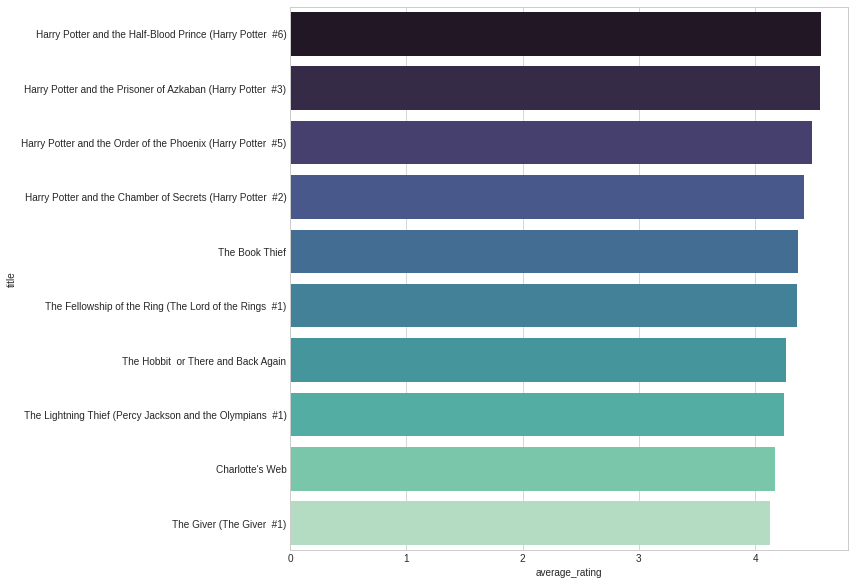

In [7]:

top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='mako')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


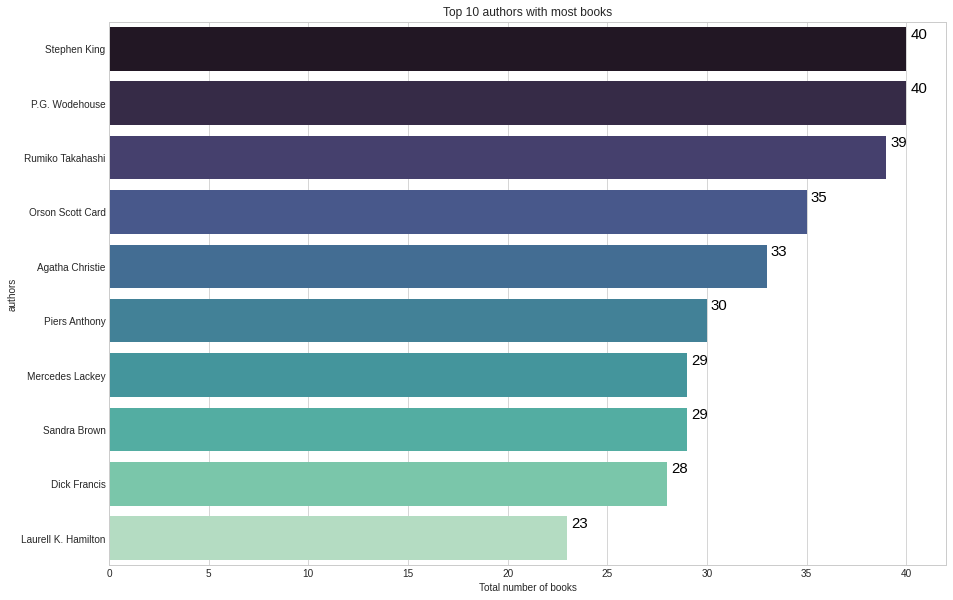

In [8]:

most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='mako')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


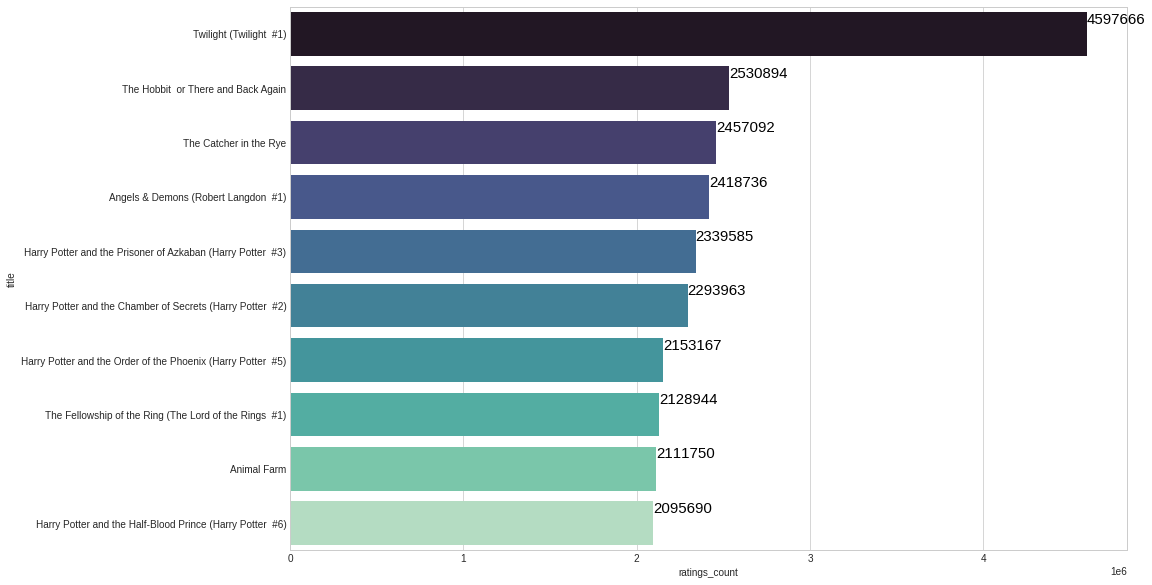

In [9]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'mako')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

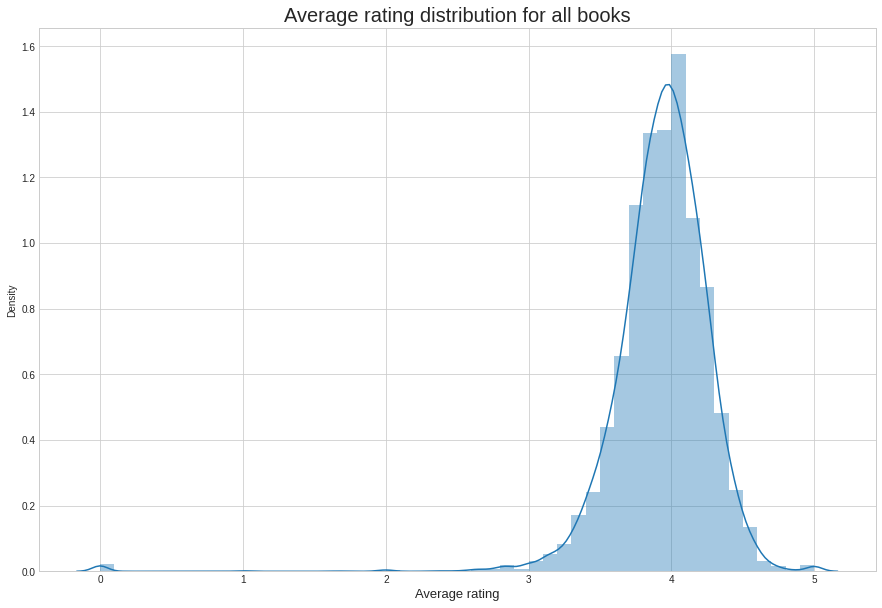

In [10]:

df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

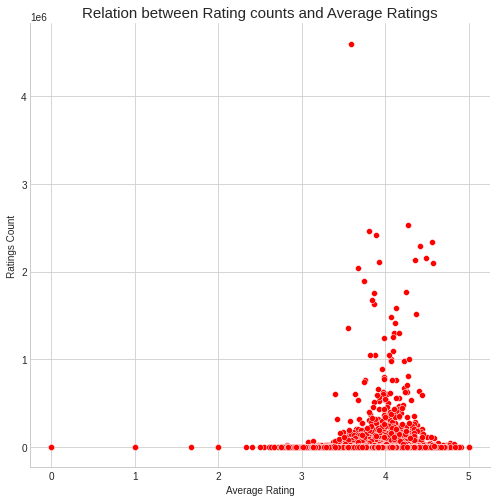

In [11]:

ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [12]:
df2 = df.copy()

In [13]:

df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [14]:

rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [15]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [16]:

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [17]:
from numpy.ma.core import array

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)


dist, idlist = model.kneighbors(features)


In [18]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('The Lightning Thief (Percy Jackson and the Olympians  #1)')
BookNames

['The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Giver (The Giver  #1)',
 'The Book Thief',
 'Little Women',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Jane Eyre']

In [19]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:

!jupyter nbconvert --to html sist_big_data.ipynb

[NbConvertApp] WARNING | pattern 'sist_big_data.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 